<a href="https://colab.research.google.com/github/metheboss1/quant-research-lab/blob/experiment_2/02_moving_averages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Auto date = real-time today
END = pd.Timestamp.today().strftime('%Y-%m-%d')
START = "2010-01-01"

In [ ]:
tickers = ["SPY", "QQQ", "TSLA", "NVDA"]

data = yf.download(
    tickers,
    start=START,
    end=END,
    interval="1d",
    progress=False
)

close = data["Close"]
close.tail()

/tmp/ipython-input-2991007459.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


Ticker,NVDA,QQQ,SPY,TSLA
Date,,,,
2025-11-26,180.259995,614.270020,679.679993,426.579987
2025-11-28,177.000000,619.250000,683.390015,430.170013
2025-12-01,179.919998,617.169983,680.270020,430.140015
2025-12-02,181.460007,622.000000,681.530029,429.239990
2025-12-03,179.589996,623.520020,683.890015,446.739990


In [ ]:
def compute_indicators(df, windows=[20, 50, 200]):
    results = {}
    for ticker in df.columns:
        price = df[ticker].dropna()

        indicators = {}
        for w in windows:
            indicators[f"SMA{w}"] = price.rolling(w).mean()
            indicators[f"EMA{w}"] = price.ewm(span=w, adjust=False).mean()

        indicators["Volatility20"] = price.pct_change().rolling(20).std()

        results[ticker] = pd.DataFrame(indicators)

    return results

ind = compute_indicators(close)
ind["SPY"].tail()

,SMA20,EMA20,SMA50,EMA50,SMA200,EMA200,Volatility20
Date,,,,,,,
2025-11-26,672.724503,670.679302,669.97918,666.306954,613.441109,625.837780,0.009678
2025-11-28,672.902502,671.889846,670.43840,666.976878,613.867464,626.410439,0.009436
2025-12-01,672.813004,672.687958,670.76980,667.498178,614.246645,626.946355,0.009469
2025-12-02,672.722504,673.530060,671.06360,668.048446,614.632275,627.489476,0.009469
2025-12-03,673.155005,674.516722,671.47720,668.669684,615.020833,628.050676,0.009079


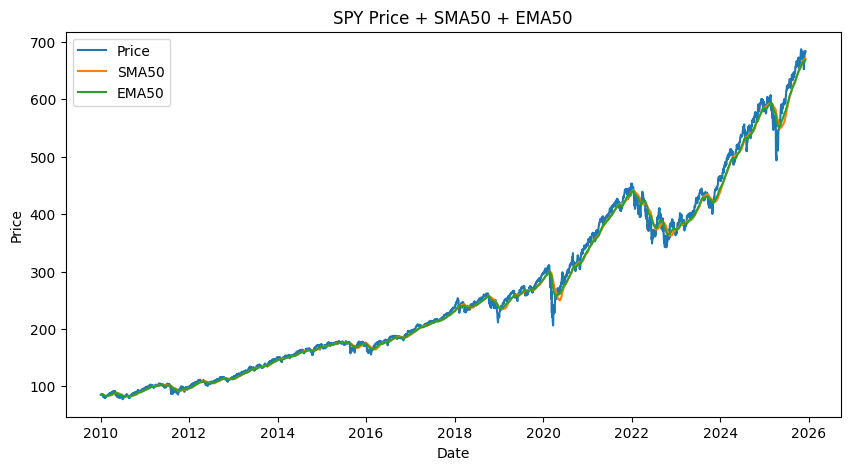

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(close["SPY"])
plt.plot(ind["SPY"]["SMA50"])
plt.plot(ind["SPY"]["EMA50"])
plt.title("SPY Price + SMA50 + EMA50")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(["Price", "SMA50", "EMA50"])
plt.show()

What I learned today
	•	SMA = lagging indicator
	•	EMA = reacts faster
	•	Rolling Volatility = market fear indicator
	•	SPY vs QQQ vs TSLA vs NVDA show different volatility regimes

What quant employers & researchers look for
	•	Clean data pipeline
	•	Modular indicator functions
	•	Multi-asset structure
	•	Ability to extend to risk-adjusted metrics